In [34]:
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt

In [83]:
X, y = make_circles(1000, factor=0.5, noise=0.2, random_state=0)

In [84]:
X_, y_ = make_blobs(n_samples=30, centers=[(0.,0.)], cluster_std=0.1, n_features=2, random_state=0)

In [89]:
y_ = np.ones_like(y_)

In [90]:
X_all = np.vstack((X, X_))

In [91]:
y_all = np.hstack((y, y_))

Text(0.5, 1.0, 'Training data')

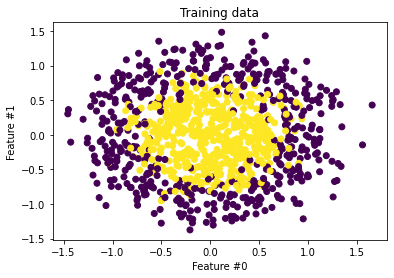

In [92]:
plt.scatter(X_all[:, 0], X_all[:, 1], c=y_all)
plt.ylabel("Feature #1")
plt.xlabel("Feature #0")
plt.title("Training data")

In [94]:
from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_all, y_all, random_state=0)

In [102]:
import torch as t
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class SyntheticDataset(Dataset):
    def __init__(self, data, labels, transform=None, target_transform=None):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return t.tensor(self.data[idx], dtype=t.float64), t.tensor(self.labels[idx], dtype=t.float64)

In [107]:
full_data = SyntheticDataset(X_all, y_all)
train_ds, val_ds, test_ds = t.utils.data.random_split(full_data, [620, 205, 205])

In [108]:
batch_size = 16

train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_ds, batch_size=1, shuffle=False)